In [2]:
import pandas
import numpy

# Tratamento de dados

## Lê o dataset e converte os dados para os tipos corretos

In [3]:
df = pandas.read_csv('dataset3.csv')
df['quality_id'] = df['quality_id'].astype('category')
df

,big_length,request_time,buffer_size,quality_id
0,246000,18481.831428,0,424520
1,1001968,18481.921044,1,808057
2,711336,18482.204785,2,1071529
3,1528344,18482.410232,3,1312787
4,1380456,18482.806065,4,1312787
...,...,...,...,...
1188,329880,10077.988136,7,424520
1189,356568,10078.522479,7,424520
1190,294592,10079.099278,8,424520
1191,170496,10079.576611,5,424520


## Normaliza os dados para treinamento

In [4]:
df_max_scaled = df.copy()

# Converte coluna de qualidades para range 0,19
quality_map = {46980: 0, 91917: 1, 135410: 2, 182366: 3, 226106: 4, 270316: 5, 352546: 6, 424520: 7, 537825: 8, 620705: 9, 808057: 10, 1071529: 11, 1312787: 12, 1662809: 13, 2234145: 14, 2617284: 15, 3305118: 16, 3841983: 17, 4242923: 18, 4726737: 19}
df_max_scaled.replace({'quality_id': quality_map}, inplace=True)
df_max_scaled

,big_length,request_time,buffer_size,quality_id
0,246000,18481.831428,0,7
1,1001968,18481.921044,1,10
2,711336,18482.204785,2,11
3,1528344,18482.410232,3,12
4,1380456,18482.806065,4,12
...,...,...,...,...
1188,329880,10077.988136,7,7
1189,356568,10078.522479,7,7
1190,294592,10079.099278,8,7
1191,170496,10079.576611,5,7


# Remove colunas indesejadas

In [5]:
#df_max_scaled.drop(['buffer_size'], axis=1, inplace=True)
#df_max_scaled

## Opcional: tratamentos opcionais

In [6]:
# Verifica quantas linhas de cada categoria existe
df_max_scaled.groupby(['quality_id']).size()

quality_id
5      45
6     523
7     358
8     130
9      49
10     30
11     16
12     18
13     24
dtype: int64

In [8]:
# Gráfico do dataset desbalanceado
import matplotlib.pyplot as plt

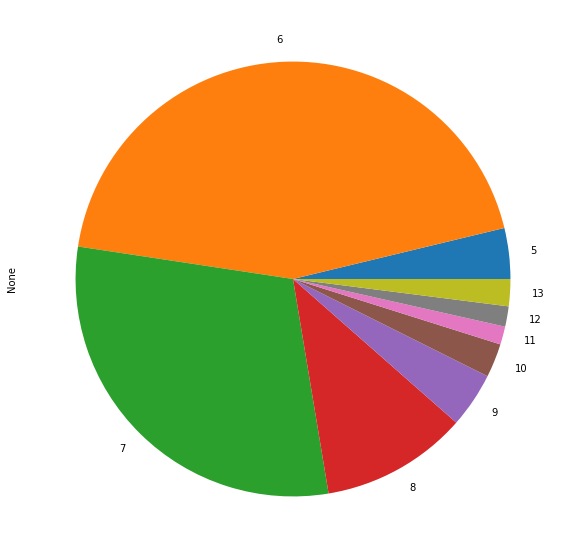

In [13]:
df_max_scaled.groupby('quality_id').size().plot.pie(figsize=(10,10))
plt.show()

In [15]:
# Limita cada categoria a 50 elementos
df_max_scaled = df_max_scaled.groupby('quality_id').head(50)
df_max_scaled.groupby(['quality_id']).size()

quality_id
5     45
6     50
7     50
8     50
9     49
10    30
11    16
12    18
13    24
dtype: int64

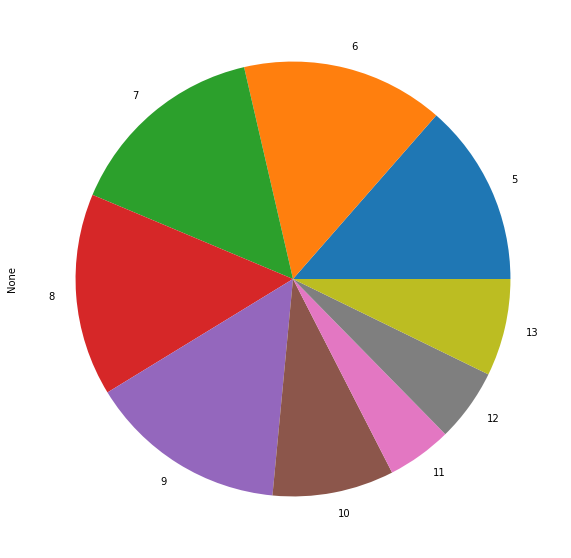

In [16]:
# Gráfico das categorias após selecionadas
df_max_scaled.groupby('quality_id').size().plot.pie(figsize=(10,10))
plt.show()

# Treinamento de modelo

In [7]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

In [8]:
# Separação de dados de treinamento e validação

X = df_max_scaled.drop(columns=['quality_id']).copy()
y = df_max_scaled['quality_id']

train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

X_train.shape

(265, 3)

In [9]:
# Treina o modelo com kernels diferentes
model_rbf = SVC(kernel='rbf')
model_poly = SVC(kernel='poly')
model_sigmoid = SVC(kernel='sigmoid')
model_linear = LinearSVC(random_state=0, tol=1e-5, max_iter=200000)

model_rbf.fit(X_train, y_train)
model_linear.fit(X_train, y_train)
model_poly.fit(X_train, y_train)
model_sigmoid.fit(X_train, y_train)

/home/matheus/.local/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC(kernel='sigmoid')

In [14]:
# Faz predição com um valor de teste
#x = numpy.array(X_test.iloc[0])
#y = numpy.array(y_test.iloc[1])

x = numpy.array([382864,18817.010532294,0])
y = numpy.array([270316])

print(model_rbf.predict([X_test.iloc[0]]))
print(model_linear.predict([X_test.iloc[0]]))
print(model_poly.predict([X_test.iloc[0]]))
print(model_sigmoid.predict([X_test.iloc[0]]))

[12]
[8]
[12]
[7]


/home/matheus/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/matheus/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/home/matheus/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/matheus/.local/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Avaliação do modelo

In [11]:
# Verifica qual modelo tem a melhor acurácia

print(f'RBF = {model_rbf.score(X_test, y_test)}')
print(f'Linear = {model_linear.score(X_test, y_test)}')
print(f'Poly = {model_poly.score(X_test, y_test)}')
print(f'Sigmoid = {model_sigmoid.score(X_test, y_test)}')

RBF = 0.6865671641791045
Linear = 0.417910447761194
Poly = 0.7014925373134329
Sigmoid = 0.3880597014925373


# Salvar modelo

Modelo é salvo em um arquivo de pesos para uso em outras aplicações (salvar aquele que teve melhor acurácia)

In [12]:
import pickle 

In [13]:
# Salva o modelo
model_tuple = (model_poly,X_train, y_train)
pickle.dump(model_tuple, open('svm.pkl', 'wb'))